In [1]:
# calculate amplitude parameters
import numpy as np
import basic
import analysis as ana
from matplotlib.pyplot import *
import prjlib

In [2]:
mb, mb0, mb1 = prjlib.binning_all(10,lmin=20,Lsp=2048)
p = prjlib.params_init(stype='lcmb',PSA='s14&15_deep56',doreal='True',dearot='True',rlmin='200')
scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,0,200,mb0,mb1)
ocb = prjlib.binned_cl(p.quad.f['EB'].ocls,mb0,mb1)
fcb = prjlib.binned_claa(2048,mb0,mb1)

obs A 0.017 mean A 0.019 sigma(A) 0.057 S/N 17.63 A>oA 0.525


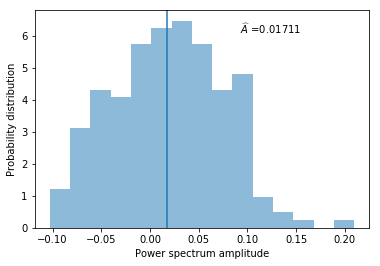

In [3]:
# amplitude estimate
st = ana.statistics(ocl=ocb,scl=scb)
ana.statistics.get_amp(st,fcl=fcb)
print('obs A', np.round(st.oA,3), 'mean A', np.round(st.mA,3), 'sigma(A)', np.round(st.sA,3), 'S/N', np.round(1./st.sA,3), 'A>oA', st.p)
xlabel(r'Power spectrum amplitude')
ylabel(r'Probability distribution')
hist(st.A,bins=15,density=1,weights=np.ones_like(st.A)/float(len(st.A)),alpha=.5,lw=0)
figtext(0.60,0.80,r'$\widehat{A}$ ='+str(st.oA)[:7])
axvline(st.oA)
#savefig('fig_null.png',bbox_inches='tight')

In [4]:
st = ana.statistics(ocb,scb)
ana.statistics.x1PTE(st)
ana.statistics.x2PTE(st)
print(np.around(st.ox1,decimals=1), np.around(st.px1,decimals=3), np.around(st.ox2,decimals=1), np.around(st.px2,decimals=3))

0.7 0.91 2.6 0.995


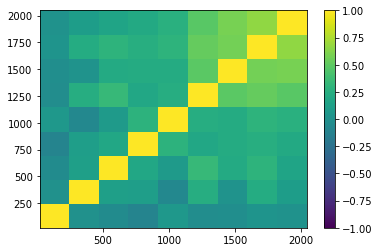

In [5]:
cor = ana.get_corrcoef(scb)
x = np.linspace(20,2048,10)
pcolor(x,x,cor,vmin=-1,vmax=1)
cb = colorbar()
cb.set_label('',labelpad=20,rotation=270)